# Autovalores e autovetores associados a matriz correspondente a equação da onda

O código inicia declarando as váriaveis do problema, onde é definido o número de pontos discretos (N) equidistantes, o comprimento do intervalo (L) e o dx por teoria é dado pela expressão $$ dx = L/(N-1)$$.

Para a construção da matriz, foi criada a variavel ```diagonal```,  utilizando np.ones, para criar uma array com N-2 elementos (todos são 1). De forma análoga, a variável ```off_diagonal``` cria uma array com N-3 elementos. 

Por fim, a variável D corresponde a matriz que buscamos encontrar os auvalores e autovetores associados. Para isso, foi utilizada
a função ```np.diag``` para computar as diagonais da matriz e ela recebe dois parametros: a matriz em questão e o número da diagonal (se for 0 é a principal, se for 1 é acima da princpal e se for -1 é abaixo). Como ilustração, temos o seguinte exemplo:

```
x = np.arange(9).reshape((3,3)) #cria uma matriz 3x3 com elemento que vao de 1 a 9
```
```
np.diag(x) #pega a diagonal principal
>>>array([0, 4, 8]) 
```

```
np.diag(x, k=1) #com o parametro k=1, pega a diagonal acima da principal. 
>>>array([1, 5])  
```

```
np.diag(x, k=-1) #com o parametro k=-11, pega a diagonal abaixo da principal. 
>>>array([3, 7]) 


Para encontrar os autovalores e autovetor dessa matriz, é utilizada a função para matrizes simétricas: ```np.linalg.eigh```. Detalhe: foi preciso inverter a matriz dos autovalores númericos, pois o último dela equivale ao primeiro termo do analítico. 

[-9.86877620e+00 -3.94651678e+01 -8.87593737e+01 -1.57701759e+02
 -2.46222904e+02 -3.54233676e+02 -4.81625317e+02 -6.28269555e+02
 -7.94018731e+02 -9.78705950e+02 -1.18214525e+03 -1.40413178e+03
 -1.64444202e+03 -1.90283400e+03 -2.17904754e+03 -2.47280451e+03
 -2.78380913e+03 -3.11174825e+03 -3.45629165e+03 -3.81709241e+03
 -4.19378724e+03 -4.58599683e+03 -4.99332626e+03 -5.41536539e+03
 -5.85168925e+03 -6.30185851e+03 -6.76541989e+03 -7.24190662e+03
 -7.73083891e+03 -8.23172446e+03 -8.74405891e+03 -9.26732638e+03
 -9.80100000e+03 -1.03445424e+04 -1.08974063e+04 -1.14590349e+04
 -1.20288628e+04 -1.26063163e+04 -1.31908138e+04 -1.37817668e+04
 -1.43785803e+04 -1.49806533e+04 -1.55873797e+04 -1.61981484e+04
 -1.68123445e+04 -1.74293496e+04 -1.80485423e+04 -1.86692993e+04
 -1.92909954e+04 -1.99130046e+04 -2.05347007e+04 -2.11554577e+04
 -2.17746504e+04 -2.23916555e+04 -2.30058516e+04 -2.36166203e+04
 -2.42233467e+04 -2.48254197e+04 -2.54222332e+04 -2.60131862e+04
 -2.65976837e+04 -2.71751

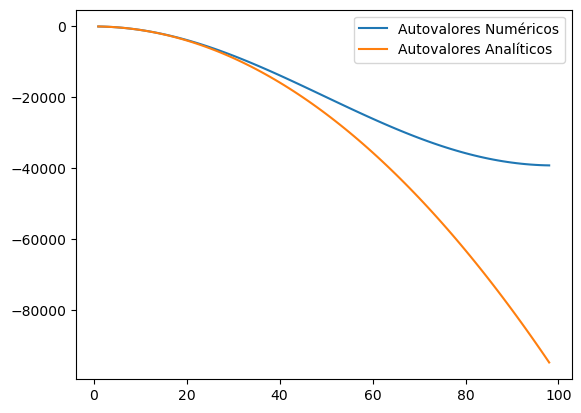

In [2]:

import numpy as np
import matplotlib.pyplot as plt


N = 100  
L = 1.0  
dx = L / (N - 1) 

# Construir a matriz D
diagonal = -2 * np.ones(N-2)
diagonal_2 = np.ones(N-3)
D = (1 / dx**2) * (np.diag(diagonal) + np.diag(diagonal_2, 1) + np.diag(diagonal_2, -1))

# Calcular autovalores
autovalores, autovetores = np.linalg.eigh(D)

autovalores_invertido = autovalores[::-1] 
print(autovalores_invertido)


n = np.arange(1, N-1)
autovalores_analitico = -(n* np.pi/L)**2
#print(autovalores_analitico)

plt.plot(n, autovalores_invertido, label='Autovalores Numéricos')
plt.plot(n, autovalores_analitico, label='Autovalores Analíticos')
plt.legend()
plt.show()

